#### This project seeks to develop a classification model that forecasts the Approval or Rejection of: Customers' credit card request given a variety of features or independent variables and  a target variable

In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data source\CreditCard_Application.csv")

In [3]:
# To view the top end of the dataset
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [4]:
# To check for number of rows and columns
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 1548 rows and 19 columns


In [5]:
# To check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
# To check for missing values in absolute terms in the dataset
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

GENDER               7
Annual_income       23
Birthday_count      22
Type_Occupation    488
dtype: int64

In [7]:
# To display the missing values in the dataset by percentages in the order of highest to lowest
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by = "% of Missing Values", ascending = False)

,% of Missing Values
Type_Occupation,31.52
Annual_income,1.49
Birthday_count,1.42
GENDER,0.45
Ind_ID,0.00
Employed_days,0.00
Family_Members,0.00
EMAIL_ID,0.00
Phone,0.00
Work_Phone,0.00


In [8]:
# To get the categorial columns
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_col)

['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']


In [9]:
# To get the numerical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(num_col)

['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']


In [10]:
# To get the number of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

Ind_ID:1548
GENDER:2
Car_Owner:2
Propert_Owner:2
CHILDREN:6
Annual_income:115
Type_Income:4
EDUCATION:5
Marital_status:5
Housing_type:6
Birthday_count:1270
Employed_days:956
Mobile_phone:1
Work_Phone:2
Phone:2
EMAIL_ID:2
Type_Occupation:18
Family_Members:7
label:2


In [11]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

Ind_ID:[5008827 5009744 5009746 ... 5115992 5118219 5053790]
GENDER:['M' 'F' nan]
Car_Owner:['Y' 'N']
Propert_Owner:['Y' 'N']
CHILDREN:[ 0  1  2  4  3 14]
Annual_income:[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   387000.  

In [12]:
# To check for duplicates 
df.duplicated().sum()

0

In [13]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,549,1537,514,1089,384,1236,1191,611,592,834
Ind_ID,5126142,5090942,5062031,5056237,5023460,5022449,5069199,5135530,5092265,5113510
GENDER,M,M,F,F,F,F,F,F,M,M
Car_Owner,Y,N,Y,N,Y,N,Y,Y,N,Y
Propert_Owner,N,N,Y,Y,Y,N,Y,Y,Y,Y
CHILDREN,2,0,0,0,0,0,1,0,0,0
Annual_income,202500.0,225000.0,225000.0,40500.0,315000.0,315000.0,225000.0,99000.0,112500.0,180000.0
Type_Income,Working,Commercial associate,Working,Working,Pensioner,Working,Commercial associate,Pensioner,Working,Working
EDUCATION,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
Marital_status,Married,Married,Single / not married,Married,Single / not married,Separated,Married,Married,Civil marriage,Married
Housing_type,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment


##### After reviewing the dataset the following were observed:
##### The column headers are not in uniform letters
##### There are missing values in some columns
#####  Ind_Id and mobile _Phones  seems irrelevant and as such will be dropped

##### These shall be addressed in the next section

In [14]:
# Correcting the column headers 
df.columns = df.columns.str.title()

In [15]:
# To check operation 
df.head(5).T

,0,1,2,3,4
Ind_Id,5008827,5009744,5009746,5009749,5009752
Gender,M,F,F,F,F
Car_Owner,Y,Y,Y,Y,Y
Propert_Owner,Y,N,N,N,N
Children,0,0,0,0,0
Annual_Income,180000.0,315000.0,315000.0,NaN,315000.0
Type_Income,Pensioner,Commercial associate,Commercial associate,Commercial associate,Commercial associate
Education,Higher education,Higher education,Higher education,Higher education,Higher education
Marital_Status,Married,Married,Married,Married,Married
Housing_Type,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment


In [16]:
# Handling missing values for Type_Occupation
df['Type_Occupation'].value_counts().sort_values(ascending = False)

Type_Occupation
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [17]:
# The above shows that the Laborers have the highest values, thus, it will be used to fill up the gaps
df['Type_Occupation'].fillna('Laborers', inplace = True)

In [18]:
# Handling missing values for Annual_Income
df['Annual_Income'].value_counts().sort_values(ascending = False)

Annual_Income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
418500.0      1
173250.0      1
56250.0       1
95850.0       1
69750.0       1
Name: count, Length: 115, dtype: int64

In [19]:
# Since is a numerical column, the median will be used instead of the mean just to avoid outlier effect
df['Annual_Income'].median()

166500.0

In [20]:
# Applying the median to fill up the gaps 
df['Annual_Income'].fillna('166500.0', inplace = True)

In [21]:
# Handling missing values for Birthday_Count
df['Birthday_Count'].value_counts().sort_values(ascending = False)

Birthday_Count
-13557.0    5
-14523.0    5
-21363.0    5
-22655.0    5
-17454.0    4
           ..
-23969.0    1
-21362.0    1
-11082.0    1
-17002.0    1
-16601.0    1
Name: count, Length: 1270, dtype: int64

In [22]:
# Since is also a numerical column, the median will be used instead of the mean just to avoid outlier effect
df['Birthday_Count'].median()

-15661.5

In [23]:
# Applying the median to fill up the gaps 
df['Birthday_Count'].fillna('-15661.5', inplace = True)

In [24]:
# Handling missing values for Gender
df['Gender'].value_counts().sort_values(ascending = False)

Gender
F    973
M    568
Name: count, dtype: int64

In [25]:
# The above shows that the F has the highest values, thus, it will be used to fill up the gaps
df['Gender'].fillna('F', inplace = True)

In [26]:
# To confirm that all missing values are sorted
df.isnull().sum()

Ind_Id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

In [27]:
# To drop Ind_Id
df.drop(columns = 'Ind_Id', inplace = True)

In [28]:
# To drop mobile phone
df.drop(columns = 'Mobile_Phone', inplace = True)

In [29]:
# To check operation
df.head(5).T

,0,1,2,3,4
Gender,M,F,F,F,F
Car_Owner,Y,Y,Y,Y,Y
Propert_Owner,Y,N,N,N,N
Children,0,0,0,0,0
Annual_Income,180000.0,315000.0,315000.0,166500.0,315000.0
Type_Income,Pensioner,Commercial associate,Commercial associate,Commercial associate,Commercial associate
Education,Higher education,Higher education,Higher education,Higher education,Higher education
Marital_Status,Married,Married,Married,Married,Married
Housing_Type,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment
Birthday_Count,-18772.0,-13557.0,-15661.5,-13557.0,-13557.0


##### This section deals with Exploratory Data Analysis (EDA)
#####  Univariate Analysis will be done for the features in the dataset

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Both Birthday_Count and Annual_Income are objects and needs to be converted to float
df['Birthday_Count'] = df['Birthday_Count'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)

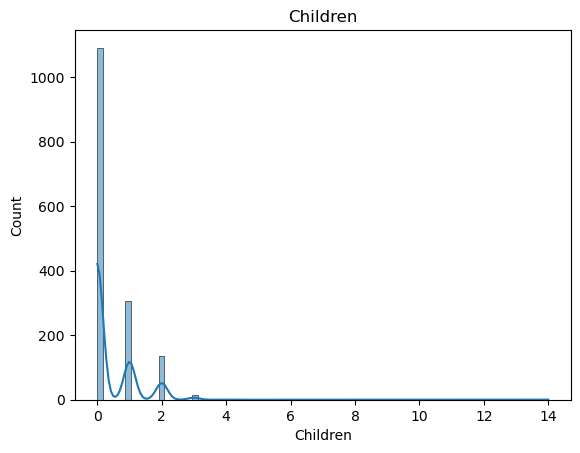

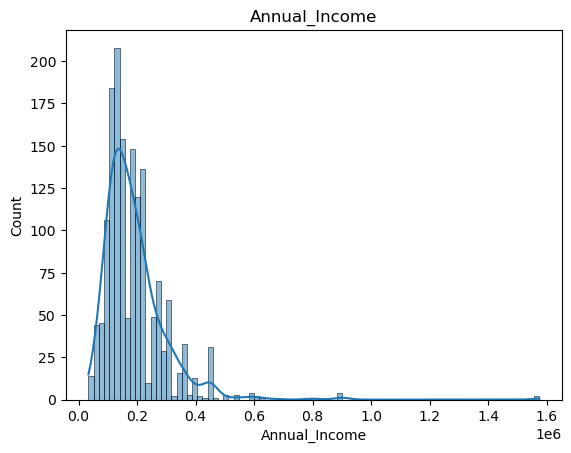

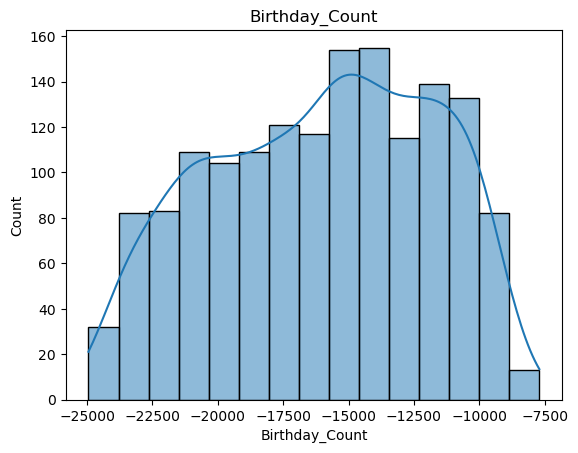

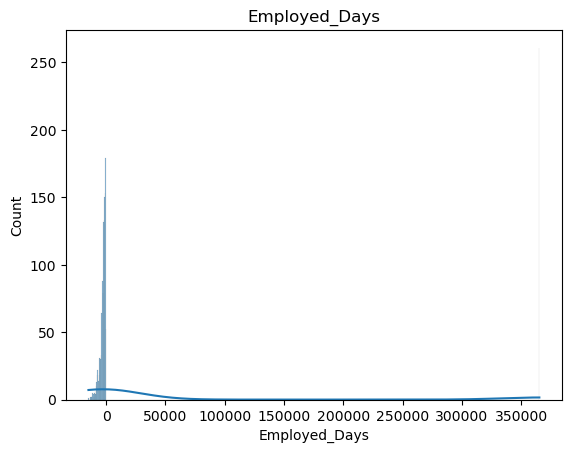

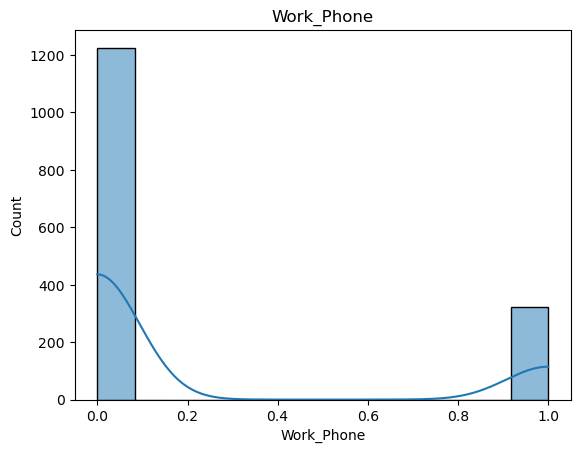

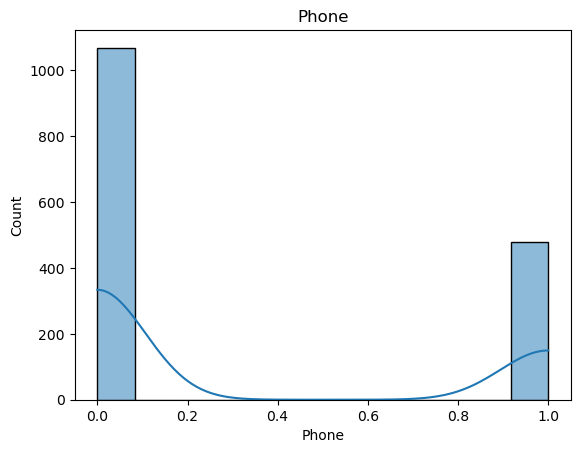

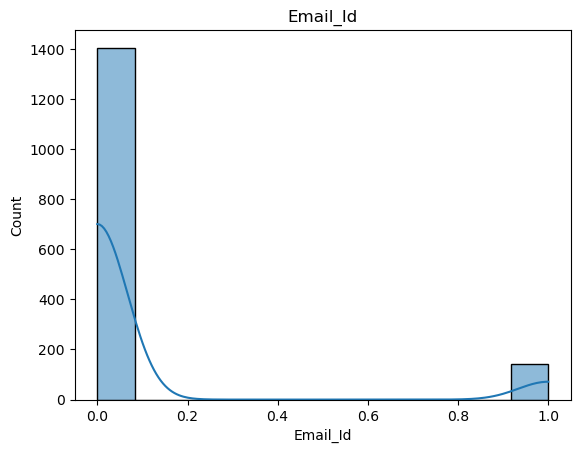

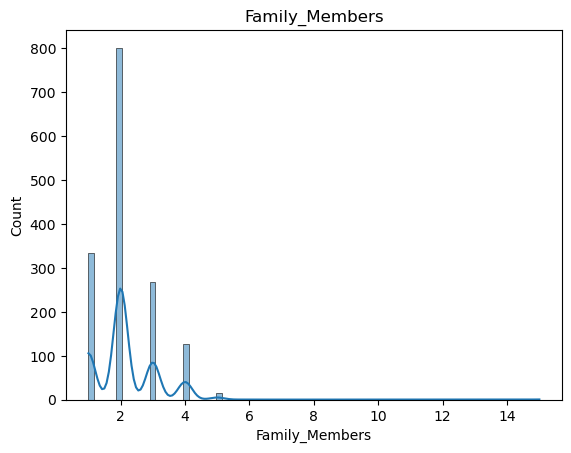

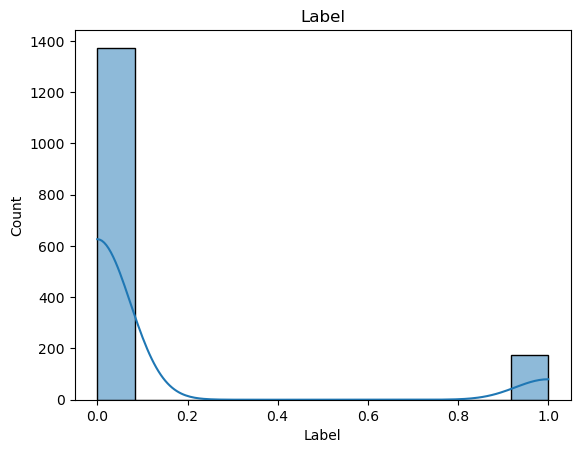

In [32]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O']
for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

In [33]:
# For the categorical colunms, a univairate analysis is also done
# Countplot is adopted to better undersand the varibales

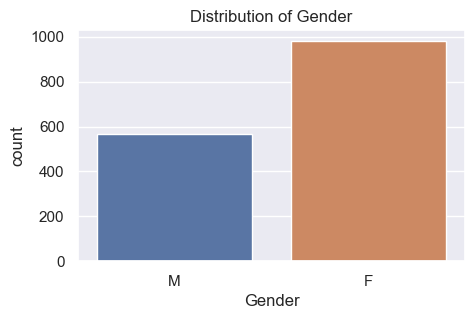

In [34]:
# For Gender
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='Gender', data = df)
plt.title('Distribution of Gender')
plt.show()

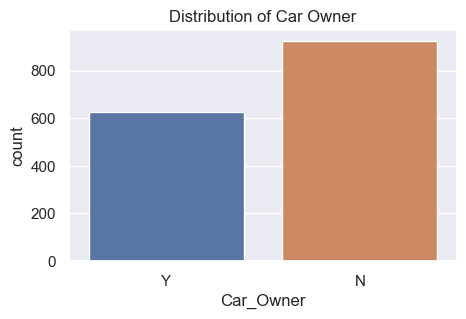

In [35]:
# For Car_Owner
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='Car_Owner', data = df)
plt.title('Distribution of Car Owner')
plt.show()

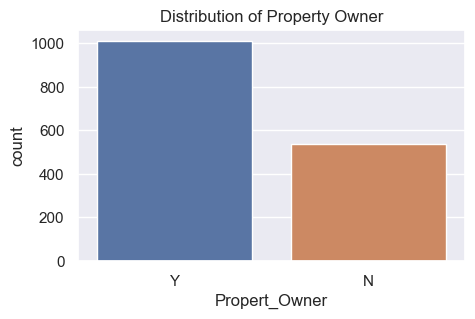

In [36]:
# For Propert_Owner
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='Propert_Owner', data = df)
plt.title('Distribution of Property Owner')
plt.show()

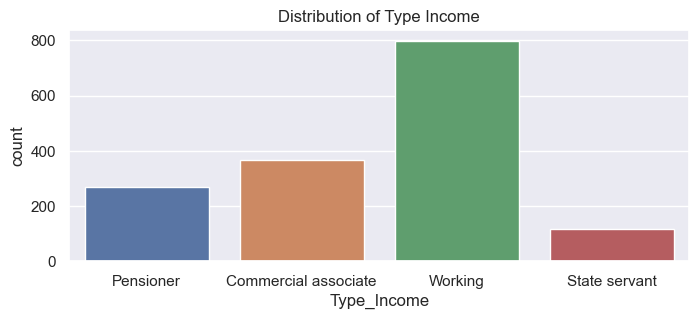

In [37]:
# For Type_Income
sns.set(rc = {'figure.figsize':(8,3)})
sns.countplot(x ='Type_Income', data = df)
plt.title('Distribution of Type Income')
plt.show()

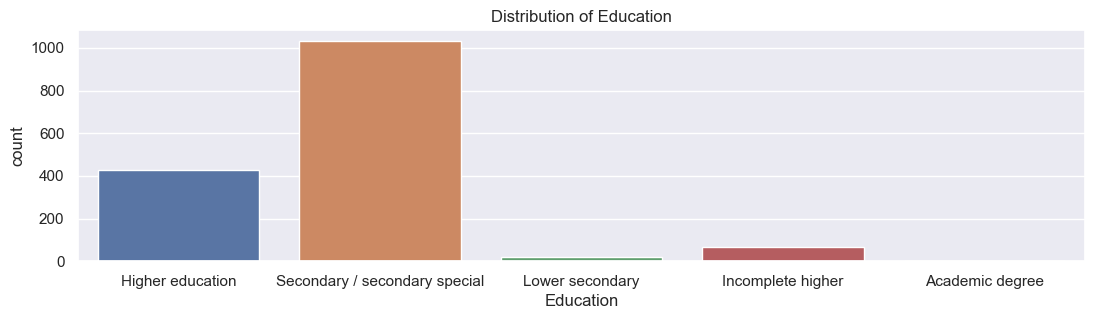

In [38]:
# For Education
sns.set(rc = {'figure.figsize':(13,3)})
sns.countplot(x ='Education', data = df)
plt.title('Distribution of Education')
plt.show()

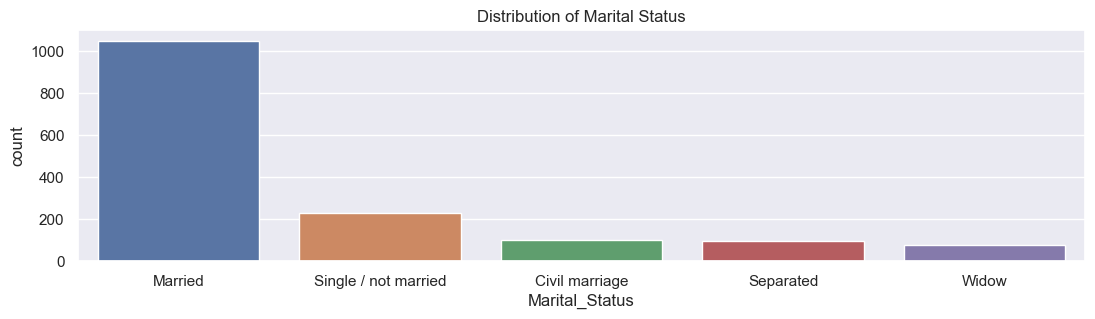

In [39]:
# For marital_Status
sns.set(rc = {'figure.figsize':(13,3)})
sns.countplot(x ='Marital_Status', data = df)
plt.title('Distribution of Marital Status')
plt.show()

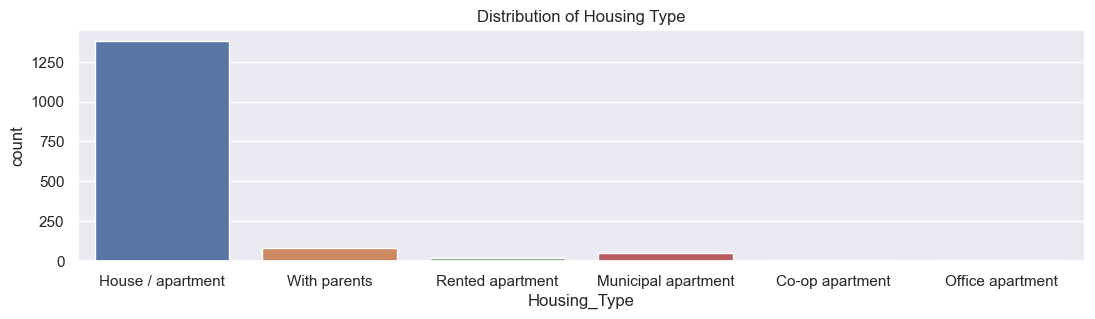

In [40]:
# For Housing_Type
sns.set(rc = {'figure.figsize':(13,3)})
sns.countplot(x ='Housing_Type', data = df)
plt.title('Distribution of Housing Type')
plt.show()

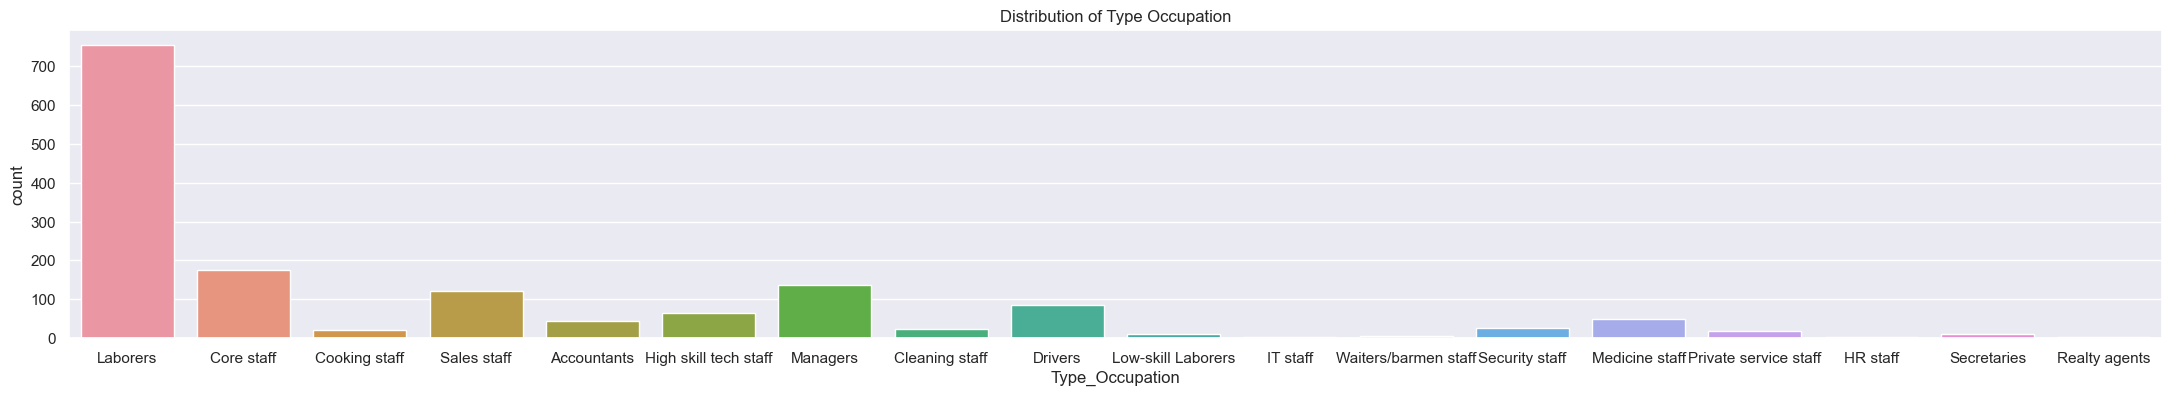

In [41]:
# For Type_Occupation
sns.set(rc = {'figure.figsize':(27,4)})
sns.countplot(x ='Type_Occupation', data = df)
plt.title('Distribution of Type Occupation')
plt.show()

###### This section seeks to identify outliers and a boxplot is used

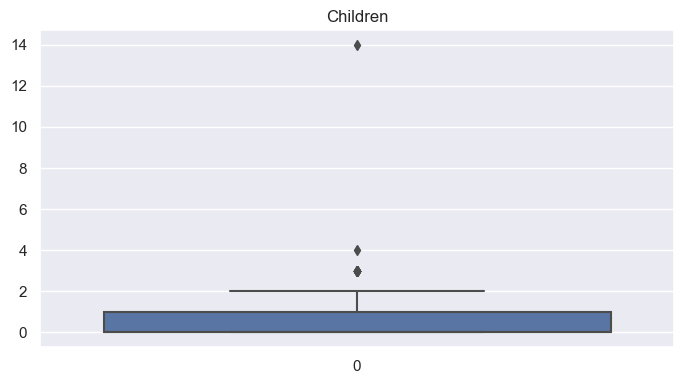

In [42]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Children'])
plt.title('Children')
plt.tight_layout()
plt.show()

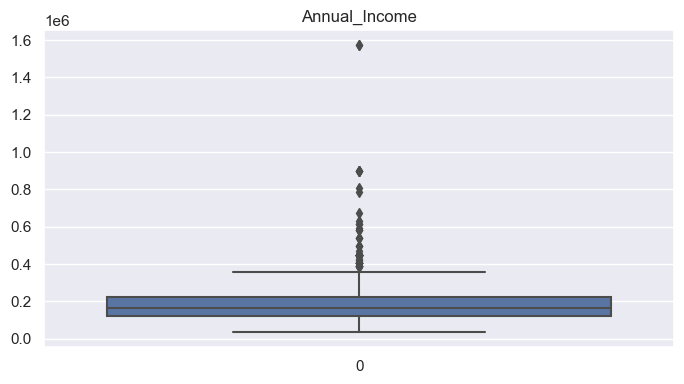

In [43]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Annual_Income'])
plt.title('Annual_Income')
plt.tight_layout()
plt.show()

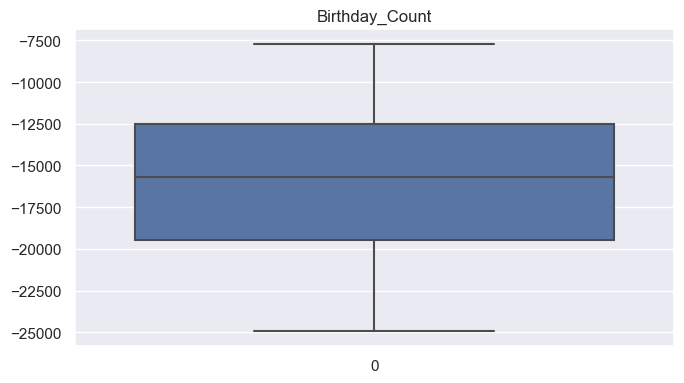

In [44]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Birthday_Count'])
plt.title('Birthday_Count')
plt.tight_layout()
plt.show()

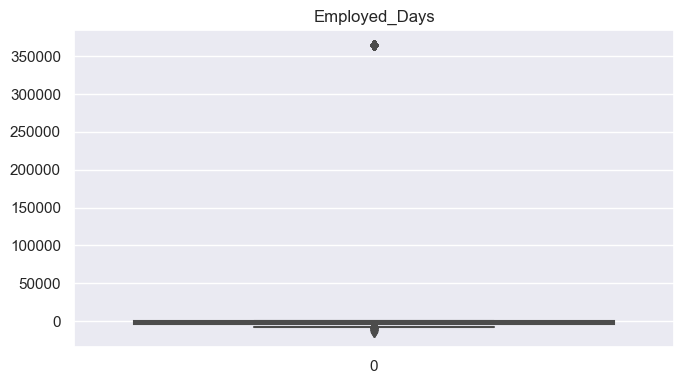

In [45]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Employed_Days'])
plt.title('Employed_Days')
plt.tight_layout()
plt.show()

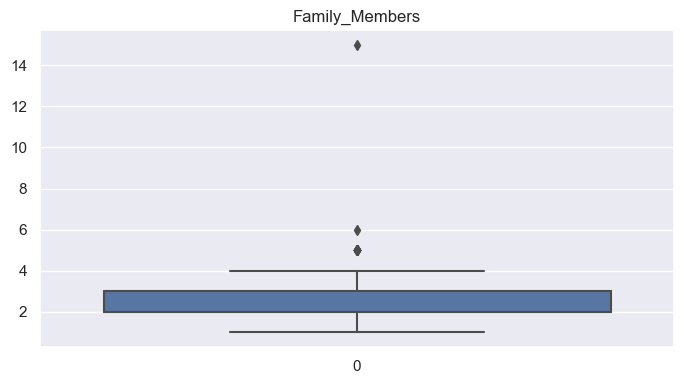

In [46]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Family_Members'])
plt.title('Family_Members')
plt.tight_layout()
plt.show()

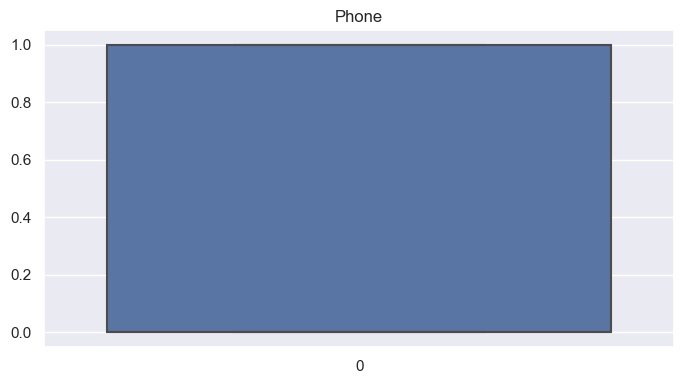

In [47]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Phone'])
plt.title('Phone')
plt.tight_layout()
plt.show()

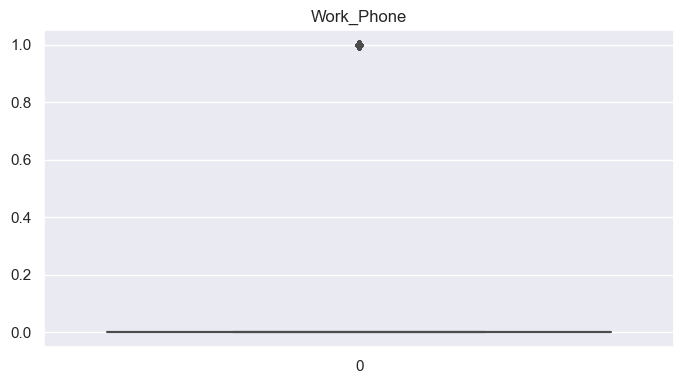

In [48]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Work_Phone'])
plt.title('Work_Phone')
plt.tight_layout()
plt.show()

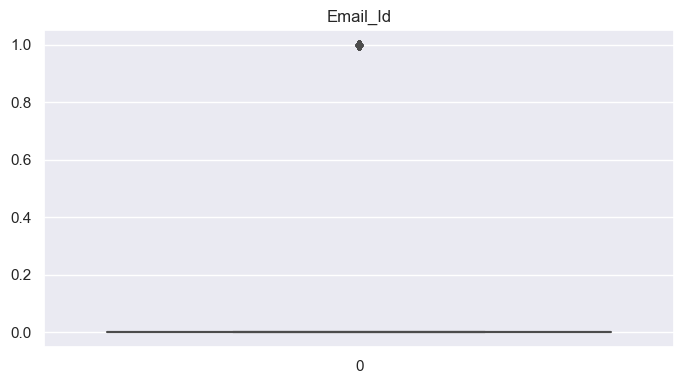

In [49]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Email_Id'])
plt.title('Email_Id')
plt.tight_layout()
plt.show()

In [50]:
# Calling up the number summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Children,1548.0,0.412791,0.776691,0.0,0.0,0.0,1.00,14.0
Annual_Income,1548.0,191029.375000,112448.335060,33750.0,121500.0,166500.0,225000.00,1575000.0
Birthday_Count,1548.0,-16034.958010,4199.561035,-24946.0,-19476.0,-15661.5,-12483.00,-7705.0
Employed_Days,1548.0,59364.689922,137808.062701,-14887.0,-3174.5,-1565.0,-431.75,365243.0
Work_Phone,1548.0,0.208010,0.406015,0.0,0.0,0.0,0.00,1.0
Phone,1548.0,0.309432,0.462409,0.0,0.0,0.0,1.00,1.0
Email_Id,1548.0,0.092377,0.289651,0.0,0.0,0.0,0.00,1.0
Family_Members,1548.0,2.161499,0.947772,1.0,2.0,2.0,3.00,15.0
Label,1548.0,0.113049,0.316755,0.0,0.0,0.0,0.00,1.0


In [51]:
# Next is to handle indentified outliers
# To handle the outliers, Interquartile Range (IQR) is computed and applied using the above number summary.
# For Children
# Calculate Q1, Q3, and IQR
Q1 = df['Children'].quantile(0.25)
Q3 = df['Children'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = (lower_bound + 1.5) # As we are dealing with humans (original value was -1.5)
upper_bound = (upper_bound - 0.5) # As we are dealing with humans (original value was 2.5)

print(lower_bound)
print(upper_bound)

0.0
2.0


In [52]:
# Applying the values to the column. Since we are dealing with humans will use (0,2) lower & upper bounds.
df['Children'] = df['Children'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

In [53]:
# For Annual Income:
# To handle the outliers, Interquartile Range (IQR) is computed and applied using the above number summary.
# Calculate Q1, Q3, and IQR
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-33750.0
380250.0


In [54]:
# Applying the values to the column. 
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

In [55]:
# For Employed_Days:
# To handle the outliers, Interquartile Range (IQR) is computed and applied using the above number summary.
# Calculate Q1, Q3, and IQR
Q1 = df['Employed_Days'].quantile(0.25)
Q3 = df['Employed_Days'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-7288.625
3682.375


In [56]:
# Applying the values to the column. 
df['Employed_Days'] = df['Employed_Days'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

In [57]:
# For Family Members:
# To handle the outliers, Interquartile Range (IQR) is computed and applied using the above number summary.
# Calculate Q1, Q3, and IQR
Q1 = df['Family_Members'].quantile(0.25)
Q3 = df['Family_Members'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = (lower_bound - 0.5) # As we are dealing with humans (original value was 0.5)
upper_bound = (upper_bound - 0.5) # As we are dealing with humans (original value was 4.5)


print(lower_bound)
print(upper_bound)

0.0
4.0


In [58]:
# Applying the values to the column. Since we are dealing with humans will use (0,5) lower & upper bounds.
df['Family_Members'] = df['Family_Members'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

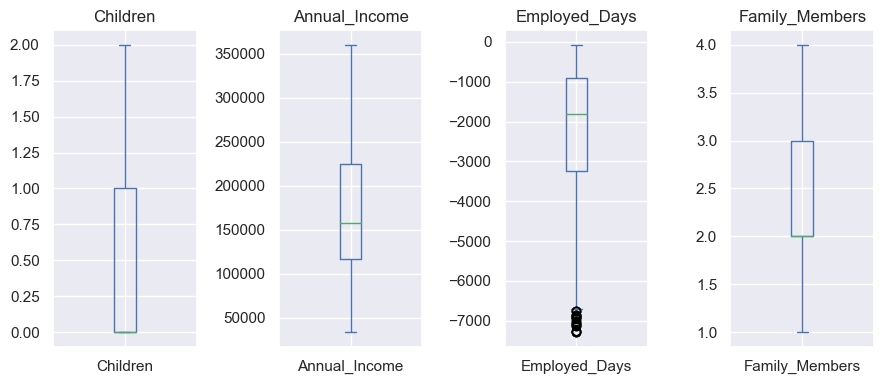

In [59]:
# Next is to check that the outliers have been taken care of:
# The boxplot will confirm

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(9, 4))

# Plot boxplot for each column
df['Children'].plot(kind='box', ax=axes[0])
df['Annual_Income'].plot(kind='box', ax=axes[1])
df['Employed_Days'].plot(kind='box', ax=axes[2])
df['Family_Members'].plot(kind='box', ax=axes[3])

# Set titles and labels
axes[0].set_title('Children')
axes[1].set_title('Annual_Income')
axes[2].set_title('Employed_Days')
axes[3].set_title('Family_Members')
plt.tight_layout()
plt.show()

In [60]:
# Noticed that after the outlier operations some null values cropped up
# They will be addressed next
df.isnull().sum()

Gender               0
Car_Owner            0
Propert_Owner        0
Children            18
Annual_Income       73
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count       0
Employed_Days      339
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation      0
Family_Members      17
Label                0
dtype: int64

In [61]:
# Addressing the nan
df['Children'].median()
df['Children'].fillna('0', inplace = True)

In [62]:
# Addressing the nan
df['Annual_Income'].median()
df['Annual_Income'].fillna('157500.0', inplace = True)

In [63]:
# Addressing the nan
df['Employed_Days'].median()
df['Employed_Days'].fillna('-1812.0', inplace = True)

In [64]:
# Addressing the nan
df['Family_Members'].median()
df['Family_Members'].fillna('2.0', inplace = True)

In [65]:
# To confirm that is all sorted
df.isnull().sum()

Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

In [66]:
# Noticed too that Children, Annual Income, Employed Days & Family Members have turned to objects
# To be addressed next
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   Children         1548 non-null   object 
 4   Annual_Income    1548 non-null   object 
 5   Type_Income      1548 non-null   object 
 6   Education        1548 non-null   object 
 7   Marital_Status   1548 non-null   object 
 8   Housing_Type     1548 non-null   object 
 9   Birthday_Count   1548 non-null   float64
 10  Employed_Days    1548 non-null   object 
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  Email_Id         1548 non-null   int64  
 14  Type_Occupation  1548 non-null   object 
 15  Family_Members   1548 non-null   object 
 16  Label            1548 non-null   int64  
dtypes: float64(1),

In [67]:
# Children, Annual Income, Employed Days & Family Members turned to original dtype
df['Children'] = df['Children'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Employed_Days'] = df['Employed_Days'].astype(float)
df['Family_Members'] = df['Family_Members'].astype(float)

In [68]:
# All sorted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   Children         1548 non-null   float64
 4   Annual_Income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   Education        1548 non-null   object 
 7   Marital_Status   1548 non-null   object 
 8   Housing_Type     1548 non-null   object 
 9   Birthday_Count   1548 non-null   float64
 10  Employed_Days    1548 non-null   float64
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  Email_Id         1548 non-null   int64  
 14  Type_Occupation  1548 non-null   object 
 15  Family_Members   1548 non-null   float64
 16  Label            1548 non-null   int64  
dtypes: float64(5),

#### This section deals with Bivariate Analysis looking  at the relationship between the input numerical variables and the target variable. A Person-r correlation and a Scatterplot are adopted.

In [69]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [70]:
# To create a DataFrame for the correlation value and p-value as well as the target variable and other features that are numerical
corr_df = pd.DataFrame(columns = ['correlation(r)', 'p-value(p)'])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col!= 'Label':
        r, p = stats.pearsonr(df['Label'], df[col])
        r = round(r,3)
        p = round(p,3)
        corr_df.loc[col] = [r, p]
    corr_df 


In [71]:
corr_df

,correlation(r),p-value(p)
Children,-0.015,0.548
Annual_Income,-0.041,0.107
Birthday_Count,-0.045,0.077
Employed_Days,0.101,0.000
Work_Phone,-0.007,0.782
Phone,-0.001,0.979
Email_Id,0.013,0.611
Family_Members,-0.027,0.281


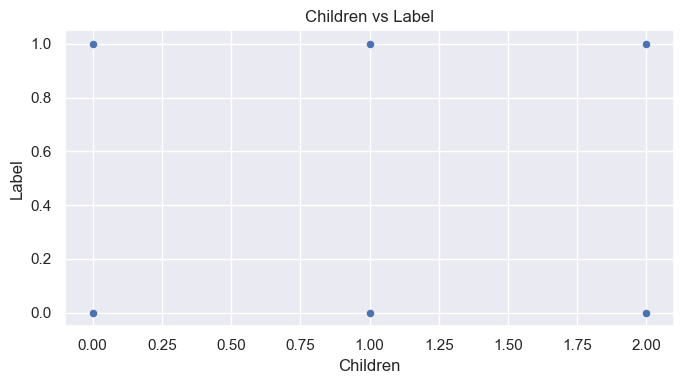

In [72]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Children', y = 'Label')
plt.title('Children vs Label')
plt.tight_layout()
plt.show()

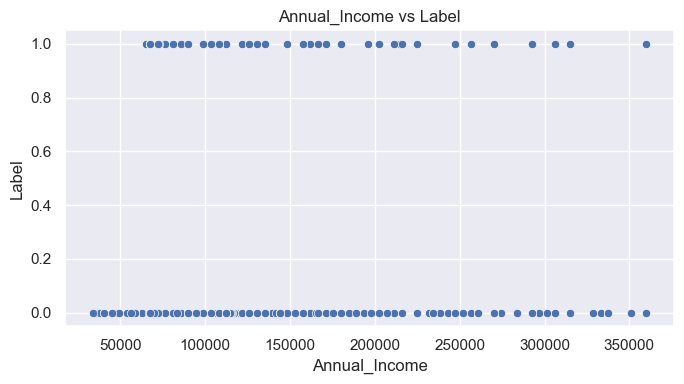

In [73]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Annual_Income', y = 'Label')
plt.title('Annual_Income vs Label')
plt.tight_layout()
plt.show()

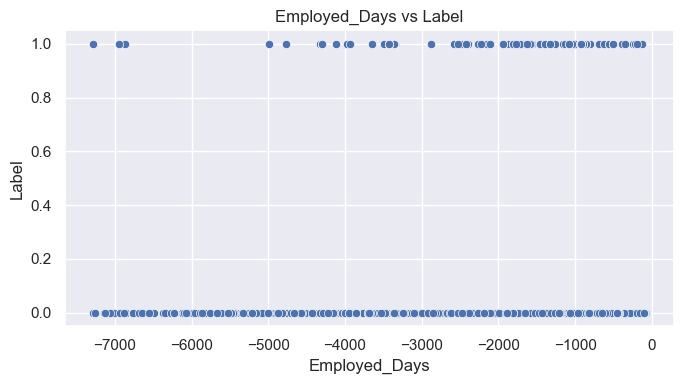

In [74]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Employed_Days', y = 'Label')
plt.title('Employed_Days vs Label')
plt.tight_layout()
plt.show()

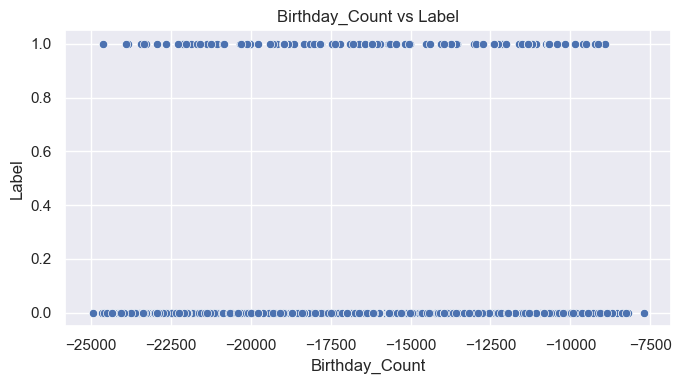

In [75]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Birthday_Count', y = 'Label')
plt.title('Birthday_Count vs Label')
plt.tight_layout()
plt.show()

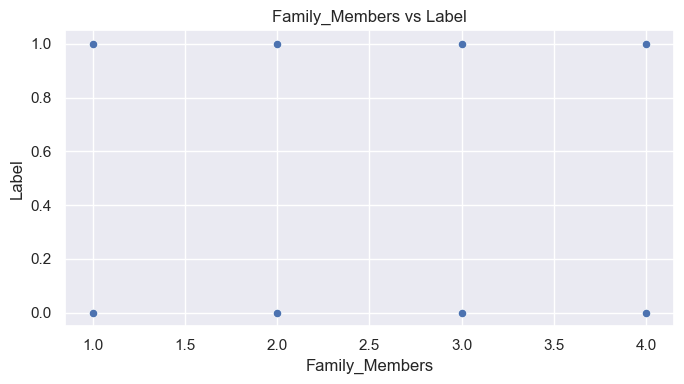

In [76]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Family_Members', y = 'Label')
plt.title('Family_Members vs Label')
plt.tight_layout()
plt.show()

##### This section equally delas with Bivariate Analysis, however, the relationship is between categorical features and the target. The statistical tools employed are t-test  and  chi square. Barchart shall be used for illustration 

In [77]:
# Bring the library
# For features with 2 unique values, t- test is applied, while features with more than 2 unique values, one way ANOVA is applied
from scipy import stats
import statistics as stat

In [78]:
# For Gender
# Split the 2 groups
yes_male = df[df['Gender']== 'M']
yes_female = df[df['Gender']== 'F']

In [79]:
# Applying the t-test
stats.ttest_ind(yes_male['Label'], yes_female['Label'])

TtestResult(statistic=1.7973513730569433, pvalue=0.07247494253976984, df=1546.0)

In [80]:
# For car owner
# Split the 2 groups
yes_owner = df[df['Car_Owner']== 'Y']
no_owner  = df[df['Car_Owner']=='N']

In [81]:
# Applying the t-test
stats.ttest_ind(yes_owner['Label'], no_owner['Label'])

TtestResult(statistic=-0.579384352539186, pvalue=0.5624142713350416, df=1546.0)

In [82]:
# For Property Owner
# Split the 2 groups
pty_owner = df[df['Propert_Owner']== 'Y']
nopty_owner = df[df['Propert_Owner']== 'N']

In [83]:
# Applying the t-test
stats.ttest_ind(pty_owner['Label'], nopty_owner['Label'])

TtestResult(statistic=-0.7041619300764618, pvalue=0.48143798487451417, df=1546.0)

In [84]:
# Features with more than 2 groups, a chi-square test is used to examine the relationships: - independent & target variable 
# import the library
from scipy.stats import chi2_contingency

In [85]:
def perform_chi_square_tests(df, categorical_variables, target_variable):
    results = {}
    
    for variable in categorical_variables:
        # Create a contingency table
        contingency_table = pd.crosstab(df[variable], df[target_variable])
        
        # Perform chi-square test
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Store results
        results[variable] = {'Chi-square statistic': chi2, 'P-value': p_value}
    
    return results

In [86]:
# Replace the list with the categorical independent variables
categorical_variables = ['Type_Income', 'Education', 'Marital_Status', 'Housing_Type', 'Type_Occupation']
target_variable = 'Label'

# Call the function
chi_square_results = perform_chi_square_tests(df, categorical_variables, target_variable)

In [87]:
# Display the results
for variable, result in chi_square_results.items():
    print(f"\nResults for {variable}:")
    print(f"Chi-square statistic: {result['Chi-square statistic']}")
    print(f"P-value: {result['P-value']}")


Results for Type_Income:
Chi-square statistic: 13.598555653674126
P-value: 0.003505783928580882

Results for Education:
Chi-square statistic: 9.205670423908046
P-value: 0.056159329722052835

Results for Marital_Status:
Chi-square statistic: 10.524107710165312
P-value: 0.03246652787478729

Results for Housing_Type:
Chi-square statistic: 28.04279521603185
P-value: 3.570429275146809e-05

Results for Type_Occupation:
Chi-square statistic: 36.56584762842536
P-value: 0.003851575952868713


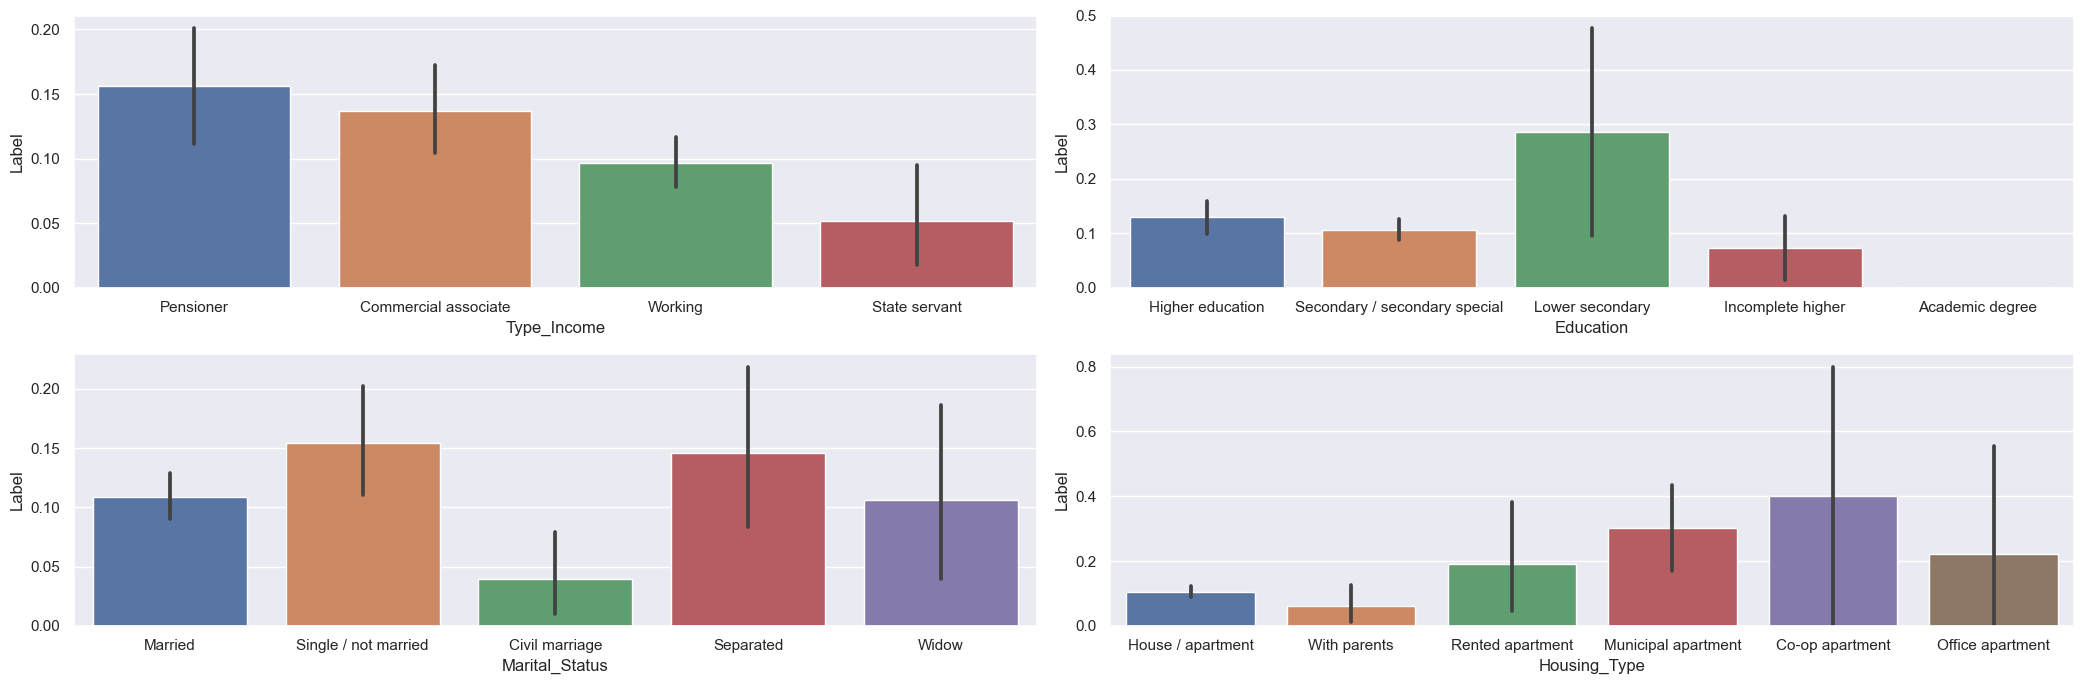

In [88]:
# create a subplot 2 by 2 grid
# categorical features plotted aganist the target variable 
fig,axes = plt.subplots(2,2,figsize = (21,7))

sns.barplot(data = df, x ='Type_Income', y = 'Label', ax = axes[0,0])

sns.barplot(data = df, x = 'Education', y = 'Label', ax = axes[0,1])

sns.barplot(data = df, x = 'Marital_Status', y = 'Label', ax = axes[1,0])

sns.barplot(data = df, x = 'Housing_Type', y = 'Label', ax = axes[1,1])

plt.tight_layout()
plt.show()

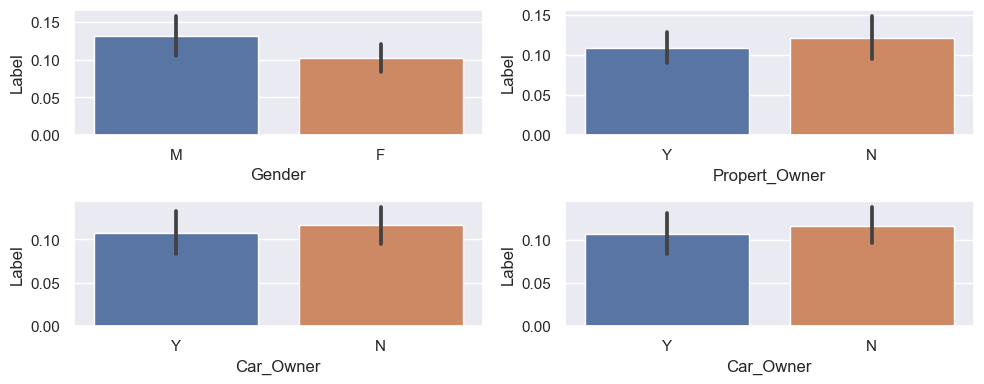

In [89]:
# create a subplot 2 by 2 grid
# categorical features plotted aganist the target variable 
fig,axes = plt.subplots(2,2,figsize = (10,4))

sns.barplot(data = df, x ='Gender', y = 'Label', ax = axes[0,0])
sns.barplot(data = df, x = 'Propert_Owner', y = 'Label', ax = axes[0,1])
sns.barplot(data = df, x ='Car_Owner', y = 'Label', ax = axes[1,0])
sns.barplot(data = df, x ='Car_Owner', y = 'Label', ax = axes[1,1])      
plt.tight_layout()
plt.show()

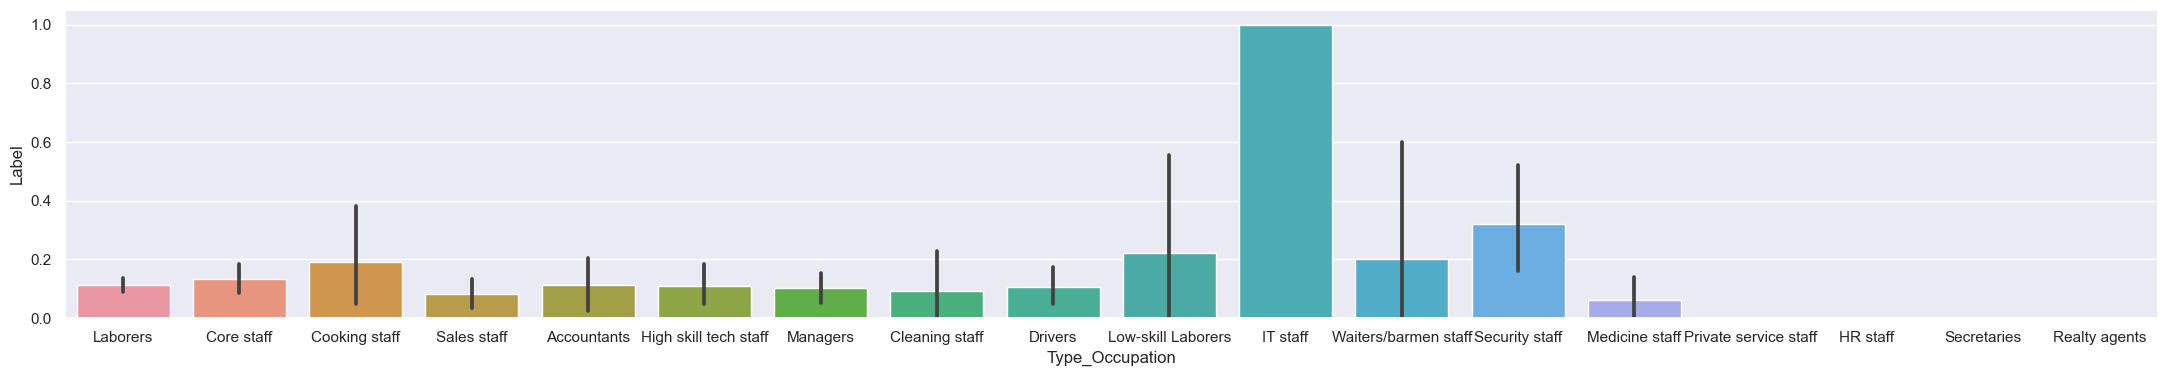

<Figure size 2900x400 with 0 Axes>

In [90]:
# Finally, for Type Occupation
sns.barplot(data = df, x ='Type_Occupation', y = 'Label')
plt.figure(figsize = (29,4))
plt.tight_layout()
plt.show()

##### This Section deals with Multivariate Analysis. The Pairplot and Heatmap will be looked at.

In [91]:
# To call up all numerical variables in the dataset
my_df = df.select_dtypes(exclude = [object])

In [92]:
my_df.corr()

,Children,Annual_Income,Birthday_Count,Employed_Days,Work_Phone,Phone,Email_Id,Family_Members,Label
Children,1.000000,0.027317,0.319664,-0.052077,0.039478,-0.000667,0.042239,0.856733,-0.015290
Annual_Income,0.027317,1.000000,0.090096,-0.063793,-0.050361,-0.024680,0.062544,0.037515,-0.040975
Birthday_Count,0.319664,0.090096,1.000000,0.073912,0.173290,-0.028548,0.166208,0.285399,-0.044918
Employed_Days,-0.052077,-0.063793,0.073912,1.000000,-0.061981,-0.000267,0.097608,-0.081696,0.101046
Work_Phone,0.039478,-0.050361,0.173290,-0.061981,1.000000,0.352439,-0.009594,0.083362,-0.007046
Phone,-0.000667,-0.024680,-0.028548,-0.000267,0.352439,1.000000,0.018105,0.013052,-0.000664
Email_Id,0.042239,0.062544,0.166208,0.097608,-0.009594,0.018105,1.000000,0.046942,0.012921
Family_Members,0.856733,0.037515,0.285399,-0.081696,0.083362,0.013052,0.046942,1.000000,-0.027394
Label,-0.015290,-0.040975,-0.044918,0.101046,-0.007046,-0.000664,0.012921,-0.027394,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


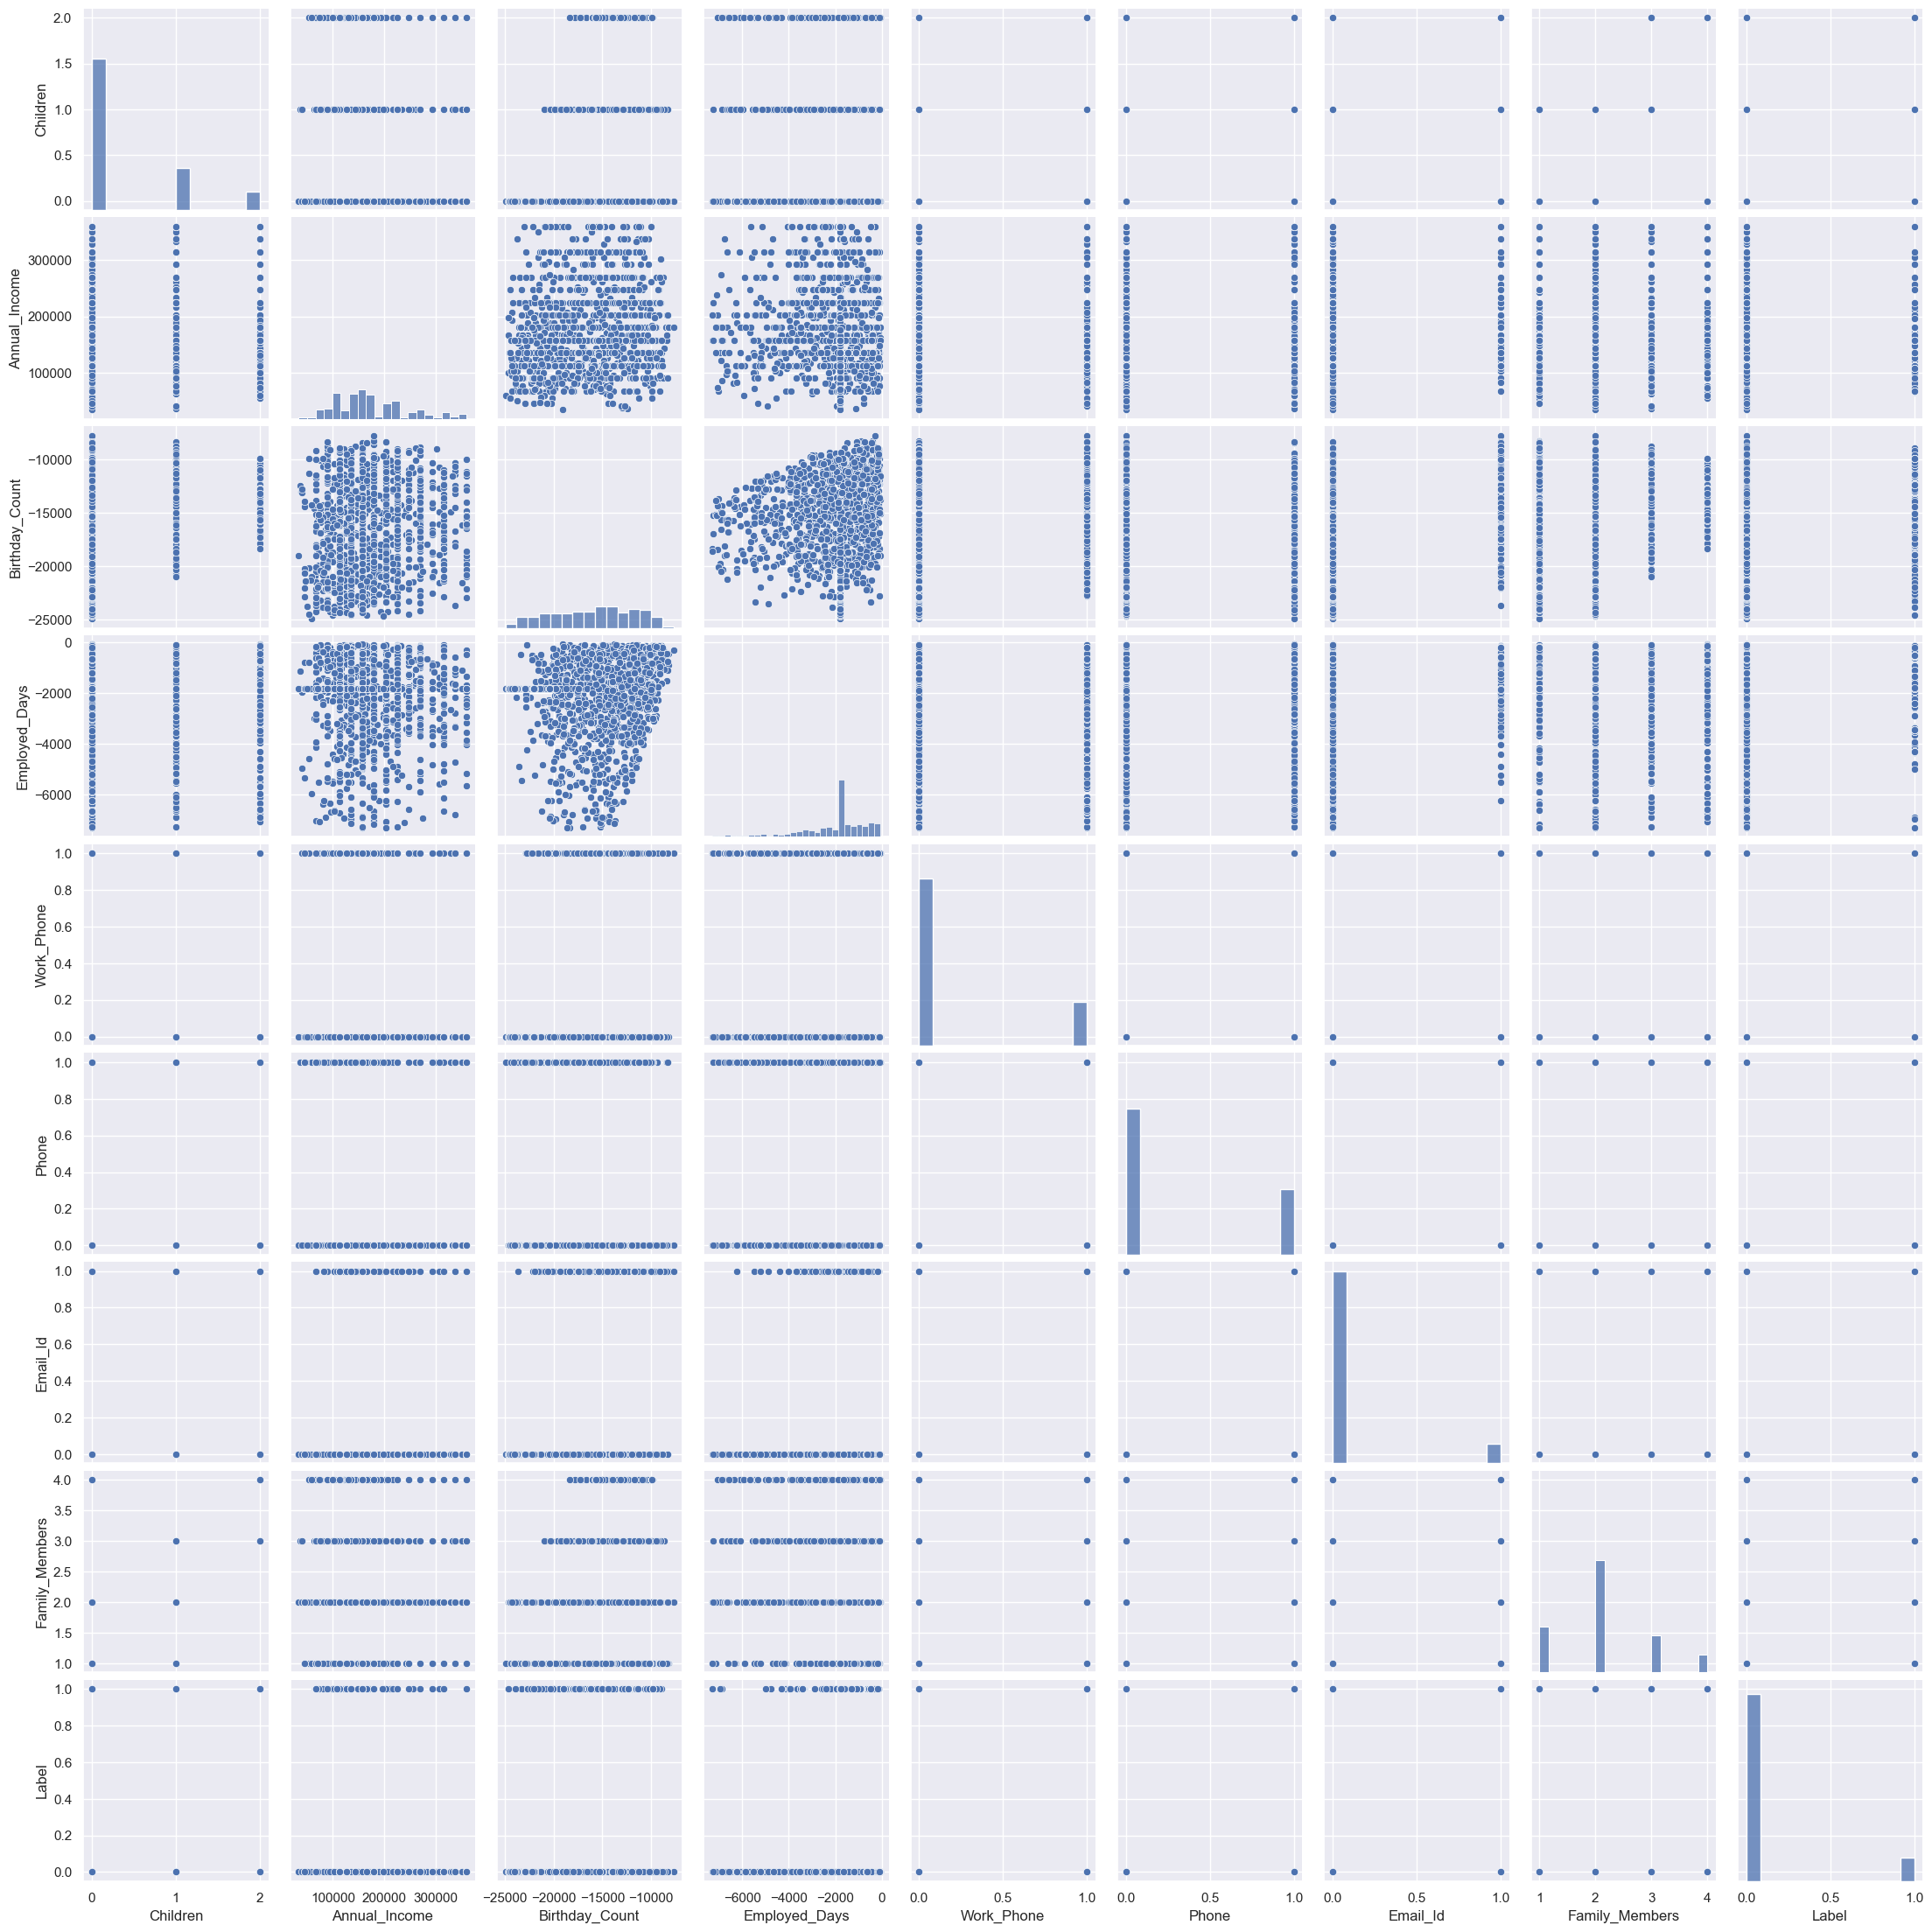

In [93]:
# Pairplot
sns.pairplot(data = my_df)

<Axes: >

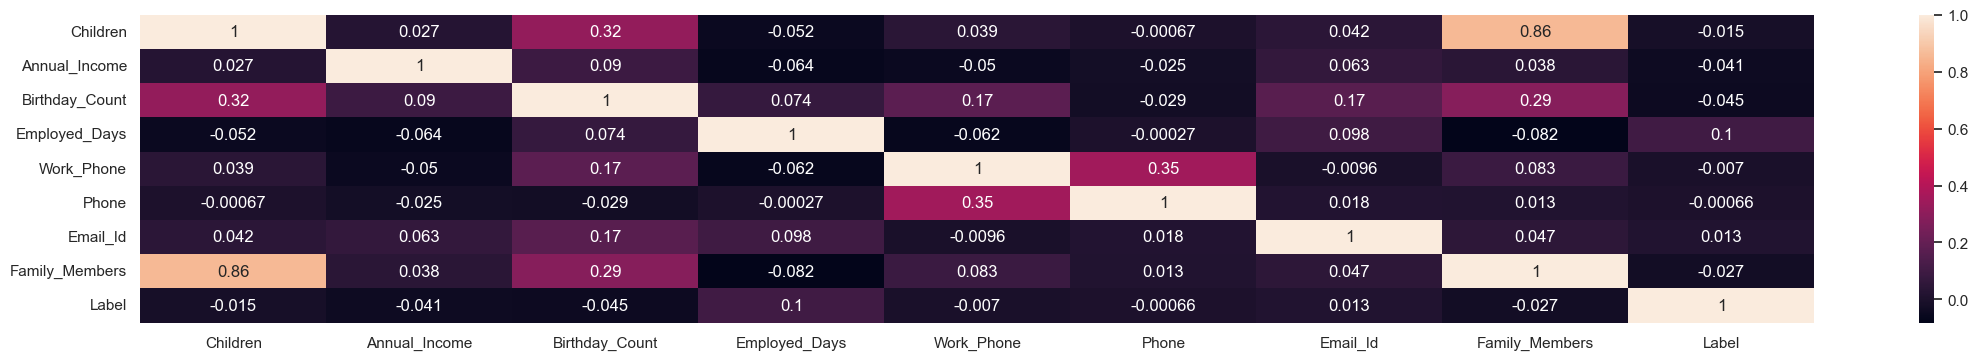

In [94]:
sns.heatmap(my_df.corr(), annot = True, cbar = True)

###### This section deals with data preprocessing for Machine learning

In [95]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


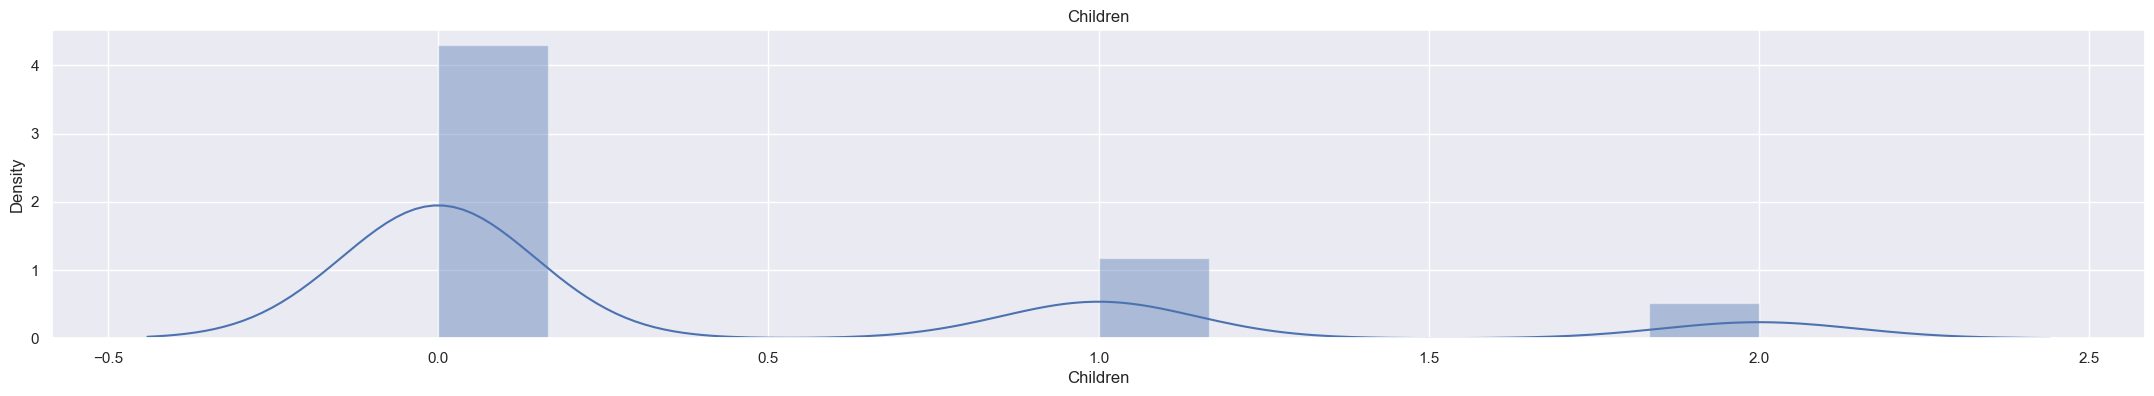

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


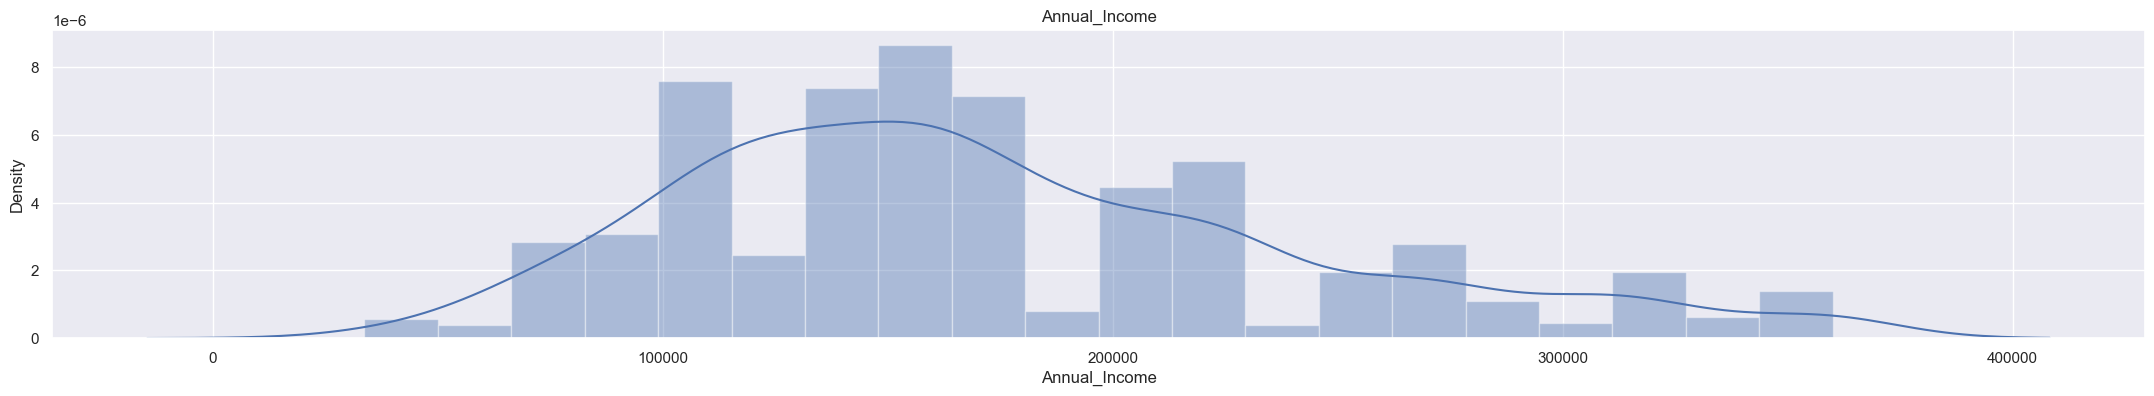

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


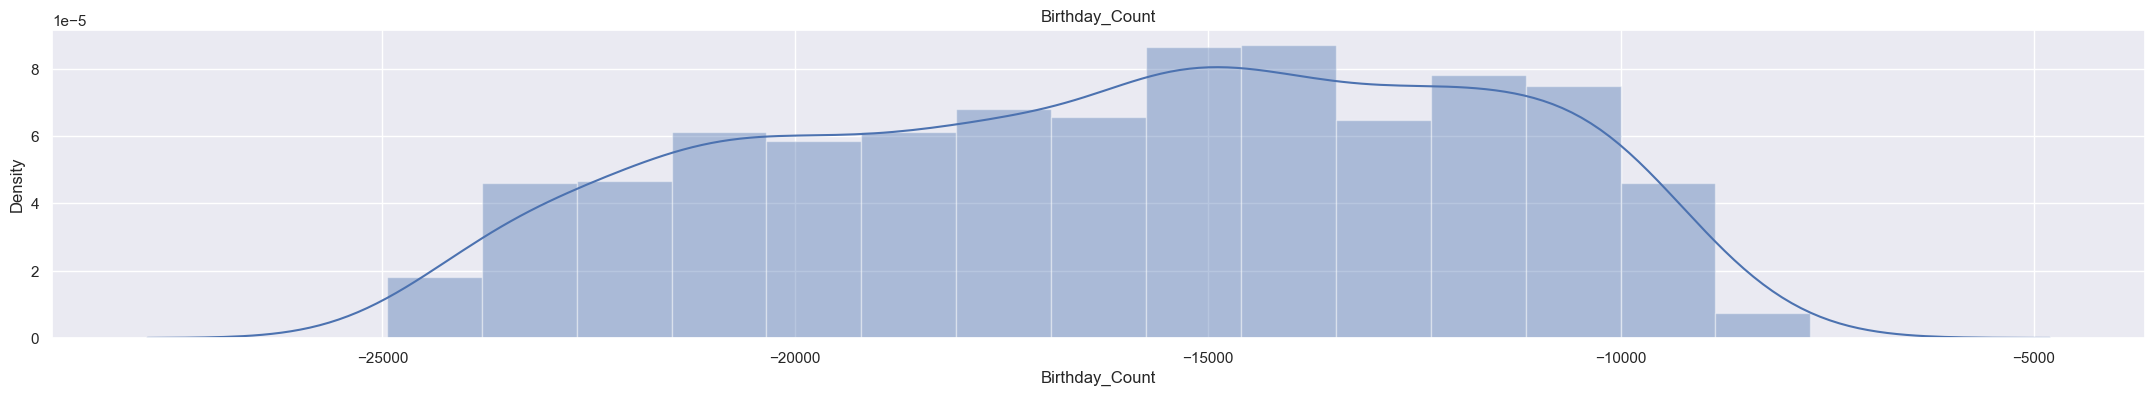

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


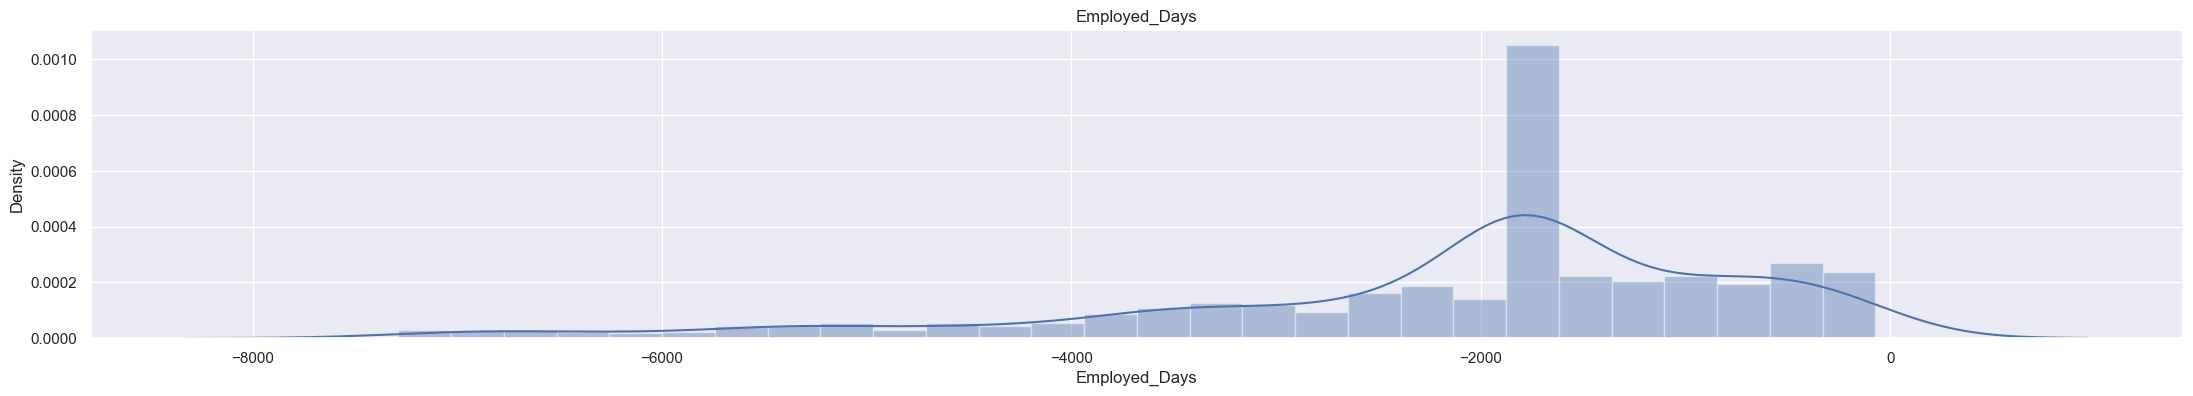

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


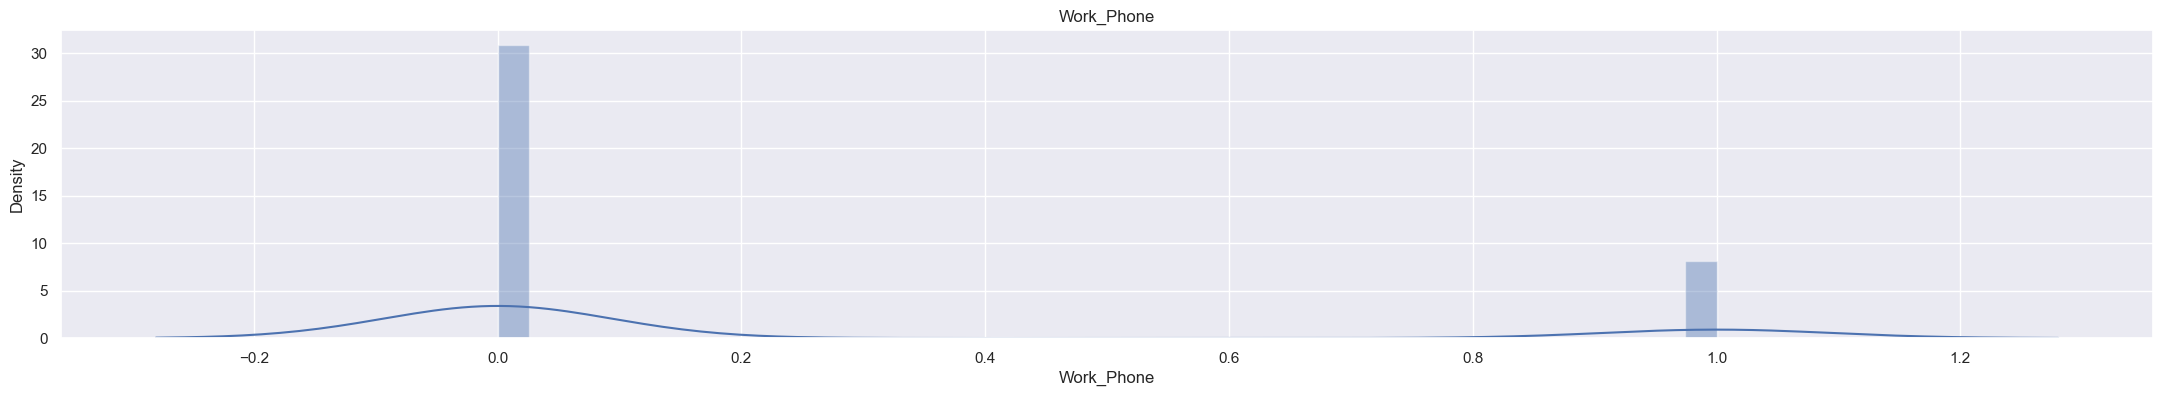

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


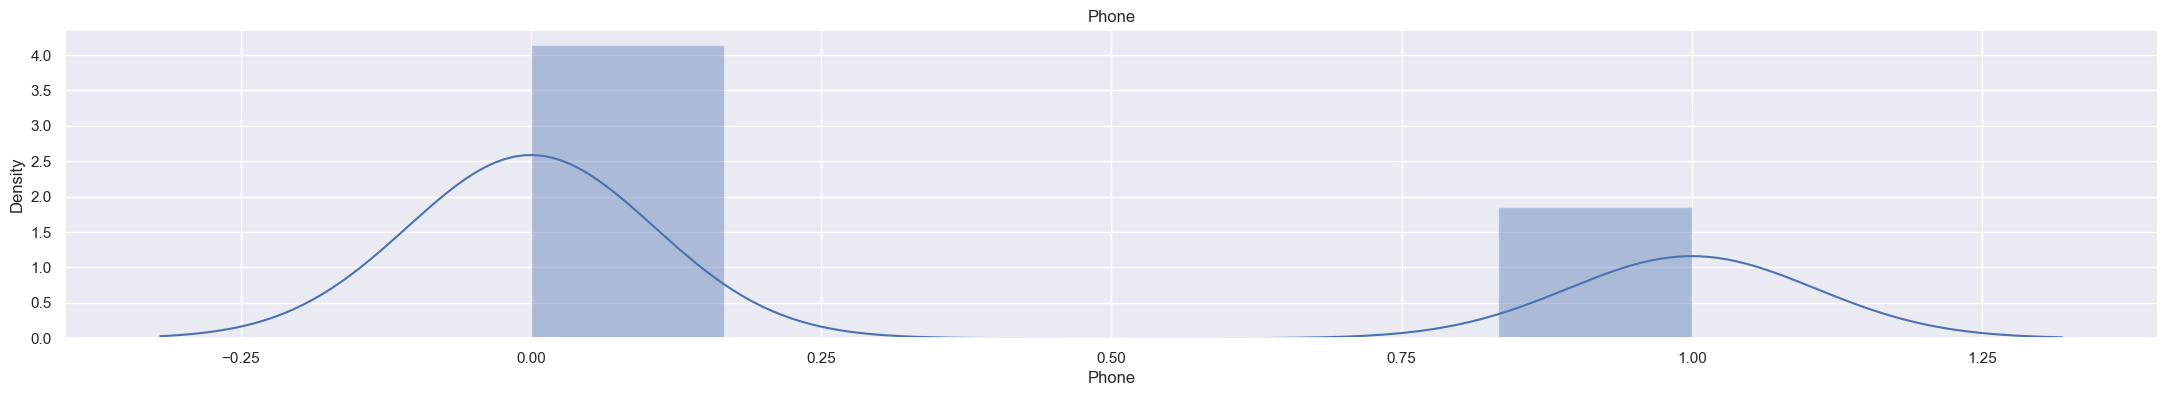

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


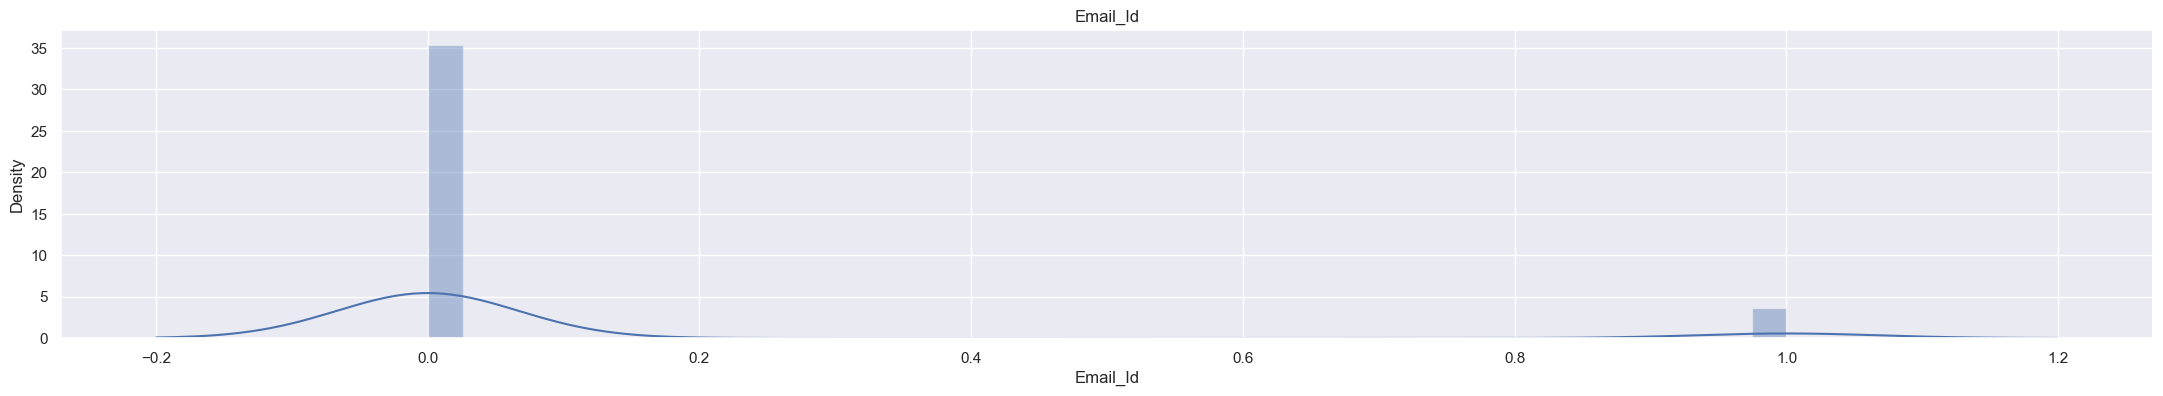

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


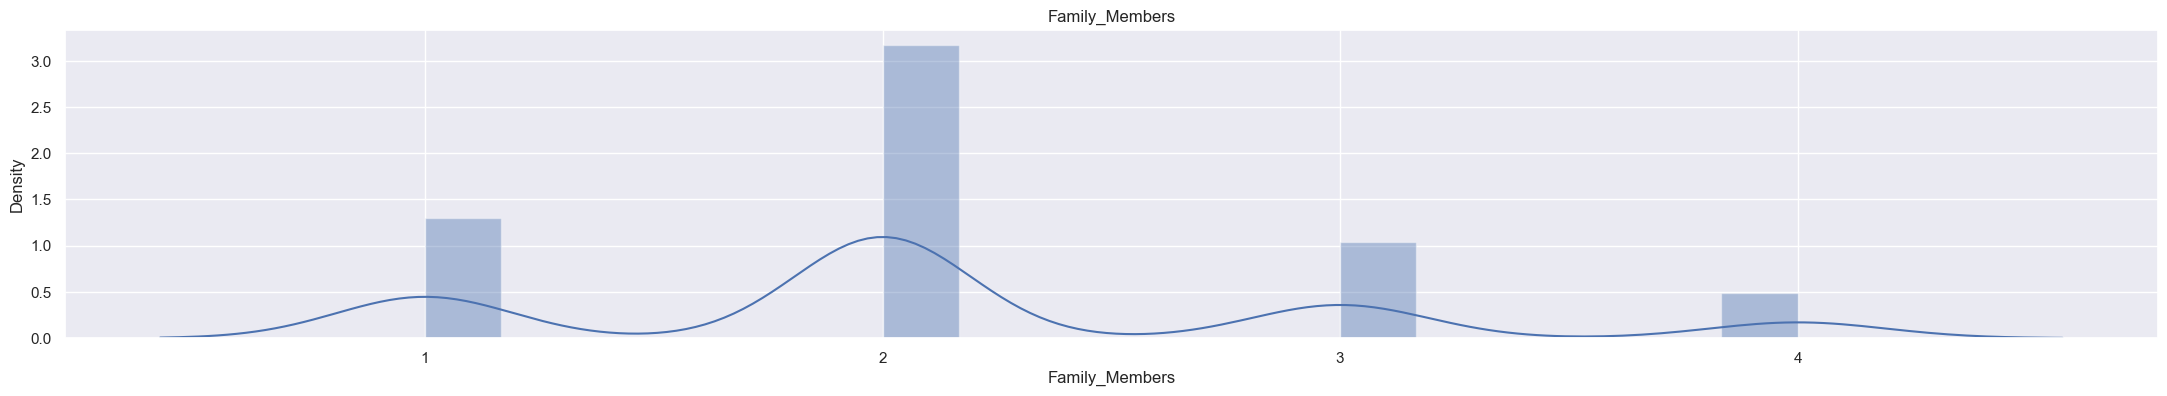

C:\Users\user\AppData\Local\Temp\ipykernel_8356\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


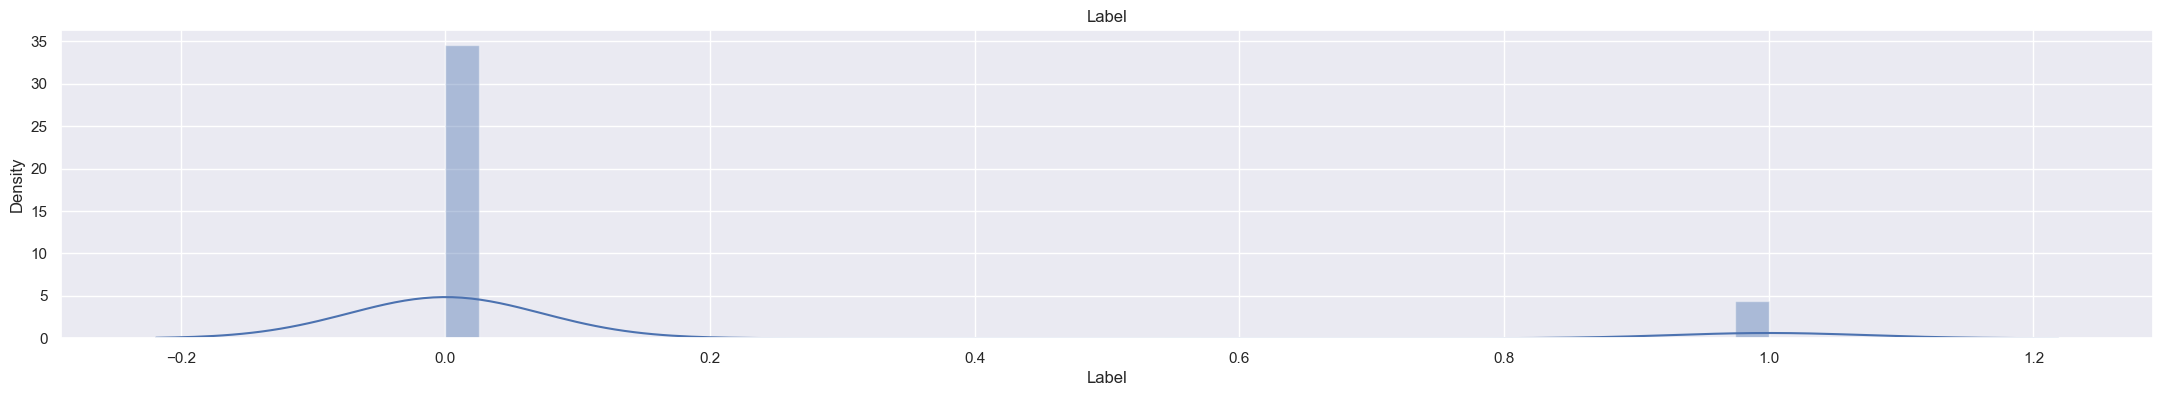

In [96]:
num_features = [num for num in df.columns if df[num].dtypes!='O']
for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [97]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

Children 1.5
Annual_Income 0.71
Birthday_Count -0.18
Employed_Days -1.25
Work_Phone 1.44
Phone 0.83
Email_Id 2.82
Family_Members 0.61
Label 2.45


In [98]:
# On closer observation only the Annual Income, Birthday Count and Employed Days are material for this model
# The rest are not because they carry few data points and as such fall below the threshold of 25 data points
# Next is to bring the Employed days to proper skweness using the boxcox transformation

In [99]:
# To transform the Employed Days using boxcox
from scipy.stats import boxcox
df['Employed_Days_bx'], _ = boxcox(df['Employed_Days'] - df['Employed_Days'].min() + 1)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.4531076773377592

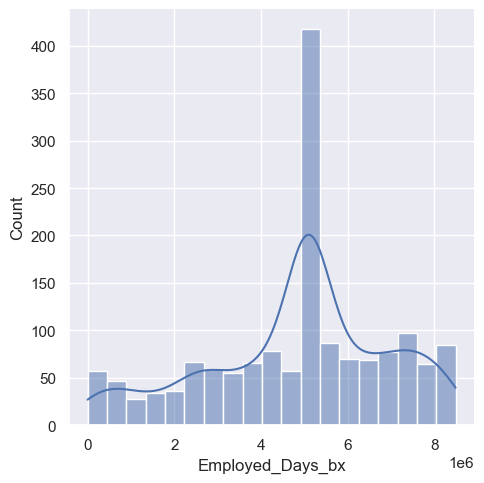

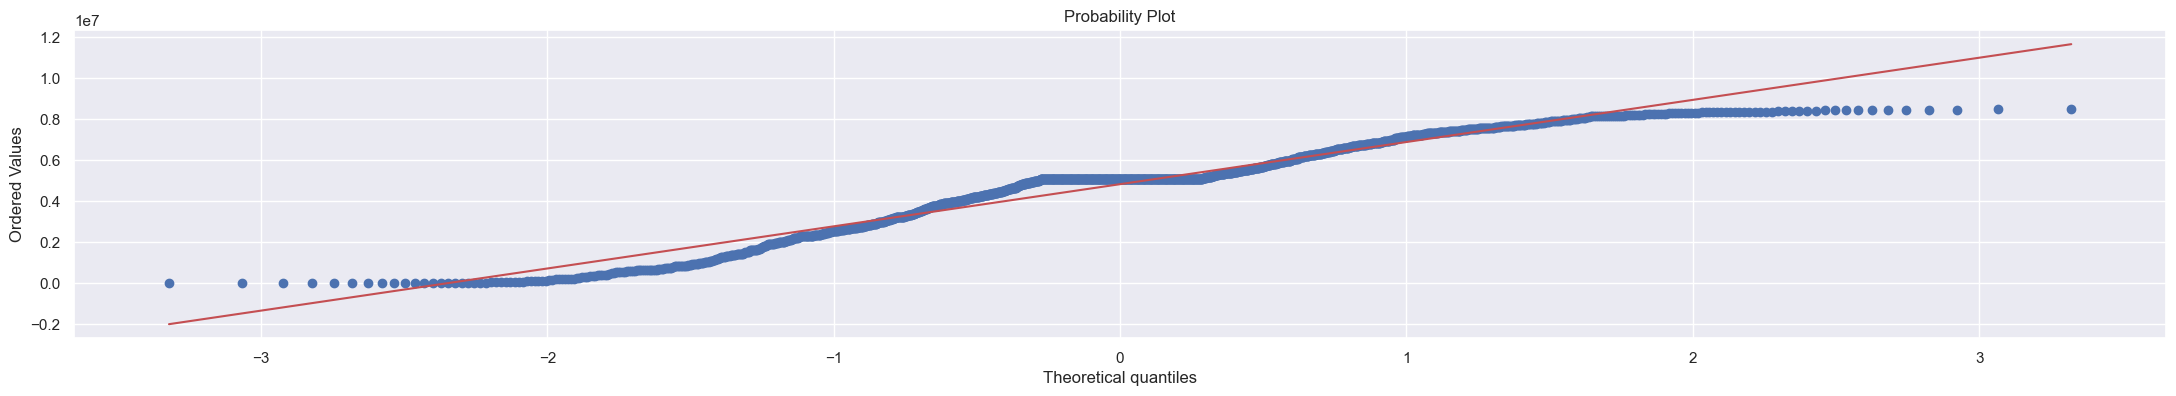

In [100]:
sns.displot(df['Employed_Days_bx'], kde = True)
fig = plt.figure()
res = stats.probplot(df['Employed_Days_bx'], plot = plt)
df['Employed_Days_bx'].skew()

In [101]:
# Based on the previous statistical tests applied and domain knowledge a new df is produced . Hence, feature seletion
# Some variables will be dropped.
df.drop(['Gender', 'Car_Owner', 'Propert_Owner', 'Education', 'Work_Phone', 'Phone', 'Email_Id', 'Family_Members'], axis = 1, inplace = True)

In [102]:
# To cofirm the operation - new df, now with 1,548 rows & 10 columns
df

,Children,Annual_Income,Type_Income,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Type_Occupation,Label,Employed_Days_bx
0,0.0,180000.0,Pensioner,Married,House / apartment,-18772.0,-1812.0,Laborers,1,5.074032e+06
1,0.0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586.0,Laborers,1,7.396980e+06
2,0.0,315000.0,Commercial associate,Married,House / apartment,-15661.5,-586.0,Laborers,1,7.396980e+06
3,0.0,166500.0,Commercial associate,Married,House / apartment,-13557.0,-586.0,Laborers,1,7.396980e+06
4,0.0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586.0,Laborers,1,7.396980e+06
...,...,...,...,...,...,...,...,...,...,...
1543,0.0,166500.0,Commercial associate,Married,House / apartment,-11957.0,-2182.0,Managers,0,4.453164e+06
1544,0.0,225000.0,Commercial associate,Single / not married,House / apartment,-10229.0,-1209.0,Accountants,0,6.165927e+06
1545,2.0,180000.0,Working,Married,House / apartment,-13174.0,-2477.0,Managers,0,3.985197e+06
1546,0.0,270000.0,Working,Civil marriage,House / apartment,-15292.0,-645.0,Drivers,0,7.275948e+06


In [103]:
# To split the DataFrame before the encoding. Target variable remain untouched
# Next is encode the features. One hot encoding is used

x = df.drop('Label', axis = 1)
y = df[['Label']]

In [104]:
# To confirm the operation(split)
x.head(2)

,Children,Annual_Income,Type_Income,Marital_Status,Housing_Type,Birthday_Count,Employed_Days,Type_Occupation,Employed_Days_bx
0,0.0,180000.0,Pensioner,Married,House / apartment,-18772.0,-1812.0,Laborers,5.074032e+06
1,0.0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586.0,Laborers,7.396980e+06


In [105]:
# To confirm the operation (split)
y.head(2)

,Label
0,1
1,1


In [106]:
# To encode
x = pd.get_dummies(x,dtype = int)

In [107]:
# To confirm operation
x

,Children,Annual_Income,Birthday_Count,Employed_Days,Employed_Days_bx,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_Status_Civil marriage,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.0,180000.0,-18772.0,-1812.0,5.074032e+06,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,315000.0,-13557.0,-586.0,7.396980e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,315000.0,-15661.5,-586.0,7.396980e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,166500.0,-13557.0,-586.0,7.396980e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,315000.0,-13557.0,-586.0,7.396980e+06,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.0,166500.0,-11957.0,-2182.0,4.453164e+06,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1544,0.0,225000.0,-10229.0,-1209.0,6.165927e+06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,2.0,180000.0,-13174.0,-2477.0,3.985197e+06,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1546,0.0,270000.0,-15292.0,-645.0,7.275948e+06,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,Children,Annual_Income,Birthday_Count,Employed_Days,Employed_Days_bx,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_Status_Civil marriage,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.0,0.448276,0.358100,0.758974,0.597771,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.862069,0.660577,0.928898,0.871436,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.862069,0.538513,0.928898,0.871436,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.406897,0.660577,0.928898,0.871436,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.862069,0.660577,0.928898,0.871436,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.0,0.406897,0.753379,0.707692,0.524626,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1544,0.0,0.586207,0.853605,0.842550,0.726406,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,1.0,0.448276,0.682791,0.666805,0.469495,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1546,0.0,0.724138,0.559944,0.920721,0.857178,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### This section deals with Machine Learning proper

In [110]:
# Nest is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
# The display of the train_split
x_train

,Children,Annual_Income,Birthday_Count,Employed_Days,Employed_Days_bx,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_Status_Civil marriage,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
680,0.0,0.517241,0.221565,0.758974,0.597771,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,1.0,0.379310,0.636100,0.784754,0.636208,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,0.5,0.379310,0.463082,0.953708,0.915363,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,0.448276,0.253408,0.758974,0.597771,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,0.0,0.310345,0.538513,0.920721,0.857178,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.862069,0.507975,0.967290,0.939837,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1294,0.5,0.517241,0.854243,0.966736,0.938832,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.241379,0.687373,0.980042,0.963084,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.420690,0.382692,0.476091,0.250427,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# The display of the train_split
y_train

,Label
680,0
1079,0
1190,0
864,0
743,0
...,...
1130,0
1294,0
860,0
1459,0


In [114]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit classification model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
random_seed = 42
np.random.seed(random_seed)

In [115]:
# Create a list of models to evaluate
models = [('RandomForest', RandomForestClassifier()),
          ('LogisticsRegression', LogisticRegression()),
          ('DecisionTree', DecisionTreeClassifier())]

In [116]:
# Nest, cross validation is performed to evaluate model
results = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_seed)
    cv_scores = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append((name,cv_scores.mean(),cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [117]:
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accurracy = {mean_score:.4f}, std = {std_score:.4f}')

RandomForest: Mean Accurracy = 0.9152, std = 0.0114
LogisticsRegression: Mean Accurracy = 0.8805, std = 0.0031
DecisionTree: Mean Accurracy = 0.8498, std = 0.0159


In [118]:
# Nest is to train and test the data
model = RandomForestClassifier()
model.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [119]:
# on seen data
model.score(x_train,y_train)

0.9927302100161551

In [120]:
# on unseen data
model.score(x_test,y_test)

0.932258064516129

In [121]:
y_test

,Label
30,1
1514,0
1182,0
1205,0
528,0
...,...
1228,0
1065,0
1345,0
485,0


In [122]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [123]:
# Actual y_test transposed to match the apperance of the predicted outcome
horizontal_array = np.array([y_test]).flatten()
print(horizontal_array)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


###### In evaluating the result of the model score, the following are used:¶
###### Accuracy Score
###### Classification Report
###### Classification Matrix

In [124]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9323


In [125]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       280
           1       0.91      0.33      0.49        30

    accuracy                           0.93       310
   macro avg       0.92      0.66      0.73       310
weighted avg       0.93      0.93      0.92       310



In [126]:
# Classification Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[279   1]
 [ 20  10]]
